# Crime Analysis of Neighbourhoods in Toronto

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import folium
import calendar
from datetime import datetime

sns.set()

## Load the dataset

In [2]:
#Loading the data
df = pd.read_csv("mci_2014_to_2019.csv")

In [3]:
#include years from 2014 2018 
df = df[df.occurrenceyear >=2014]
df = df[df.occurrenceyear <=2019]

In [4]:
df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,352.0,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,227.0,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,228.0,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,330.0,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,352.0,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005


In [5]:
df.describe()

,X,Y,Index_,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,ObjectId
count,205321.000000,205321.000000,205321.000000,205321.000000,205321.000000,205321.000000,205321.000000,205321.000000,205321.000000,205321.000000,205321.000000,205321.000000,205321.000000,205321.000000,205321.000000,205321.000000,205321.000000
mean,-79.395038,43.707322,103443.021245,1697.213807,146.077912,2016.626833,15.748711,187.394451,12.832345,2016.607035,15.546023,186.552579,12.576775,72.210086,-79.395038,43.707322,103442.914008
std,0.104335,0.052708,59529.664987,323.552963,51.749843,1.714717,8.769403,103.537580,6.590369,1.712493,8.882357,103.724321,7.208911,40.749973,0.104335,0.052708,59529.625293
min,-79.639267,43.587093,1.000000,1410.000000,100.000000,2014.000000,1.000000,1.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,1.000000,-79.639267,43.587093,1.000000
25%,-79.471481,43.661152,52045.000000,1430.000000,100.000000,2015.000000,8.000000,100.000000,8.000000,2015.000000,8.000000,99.000000,7.000000,36.000000,-79.471481,43.661152,52046.000000
50%,-79.393372,43.701092,103522.000000,1450.000000,100.000000,2017.000000,16.000000,189.000000,14.000000,2017.000000,16.000000,188.000000,14.000000,76.000000,-79.393372,43.701092,103522.000000
75%,-79.319893,43.752068,154958.000000,2120.000000,200.000000,2018.000000,23.000000,277.000000,18.000000,2018.000000,23.000000,276.000000,19.000000,108.000000,-79.319893,43.752068,154957.000000
max,-79.123100,43.850788,206435.000000,2135.000000,230.000000,2019.000000,31.000000,366.000000,23.000000,2019.000000,31.000000,366.000000,23.000000,140.000000,-79.123100,43.850788,206435.000000


## Check for missing values

In [6]:
print('Missing Data')
df.isnull().sum().sort_values(ascending=False)

Missing Data


ObjectId               0
reporteddayofyear      0
Y                      0
Index_                 0
event_unique_id        0
occurrencedate         0
reporteddate           0
premisetype            0
ucr_code               0
ucr_ext                0
offence                0
reportedyear           0
reportedmonth          0
reportedday            0
reporteddayofweek      0
Lat                    0
reportedhour           0
occurrenceyear         0
occurrencemonth        0
occurrenceday          0
occurrencedayofyear    0
occurrencedayofweek    0
occurrencehour         0
MCI                    0
Division               0
Hood_ID                0
Neighbourhood          0
Long                   0
X                      0
dtype: int64

## Data Visualization

### Correlation Tab for the Major Crime Incidents

In [7]:
df_ct_t =  pd.crosstab(df.MCI, df.occurrenceyear, margins=False).reindex()
df_ct_t = df_ct_t.T
type_corr = df_ct_t.corr()
type_corr

MCI,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
MCI,,,,,
Assault,1.000000,0.640200,0.391566,0.037705,0.838642
Auto Theft,0.640200,1.000000,0.924656,-0.433796,0.899611
Break and Enter,0.391566,0.924656,1.000000,-0.528755,0.765283
Robbery,0.037705,-0.433796,-0.528755,1.000000,-0.094986
Theft Over,0.838642,0.899611,0.765283,-0.094986,1.000000


Text(0.5, 1, 'Correlation heatmap')

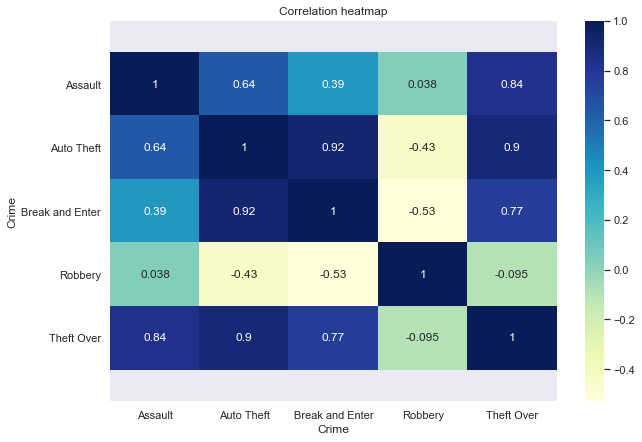

In [8]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(type_corr, annot=True, cmap="YlGnBu") #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel("Crime")
ax.set_ylabel("Crime")
ax.set_title("Correlation heatmap")

## Frequency Distribution for the number of crimes reported for each of the premise types

Text(0.5, 1.0, 'Frequency distribution of Premise type')

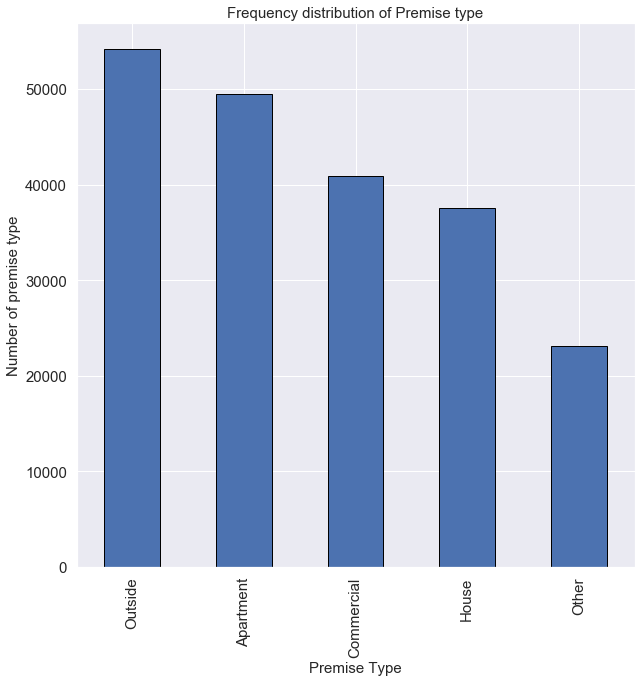

In [9]:
df['premisetype'].value_counts().plot.bar(title="Frequency distribution of Premise type", fontsize = 15, figsize = (10,10), edgecolor="black" ,linewidth=1.0)
plt.xlabel('Premise Type', fontsize=15)
plt.ylabel('Number of premise type',fontsize=15)
plt.title("Frequency distribution of Premise type",fontsize=15)

## Horizontal Frequency Distribution for each of MCI Types

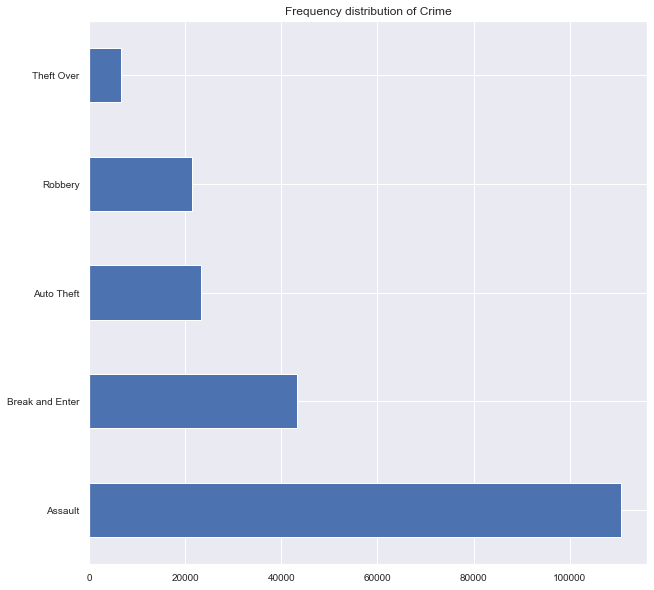

In [11]:
df['MCI'].value_counts().plot.barh(title="Frequency distribution of Crime", fontsize = 10, figsize = (10,10))

## Segmented Bar Plot: Number of crimes commited for each of the MCI Type segmente by occurance year

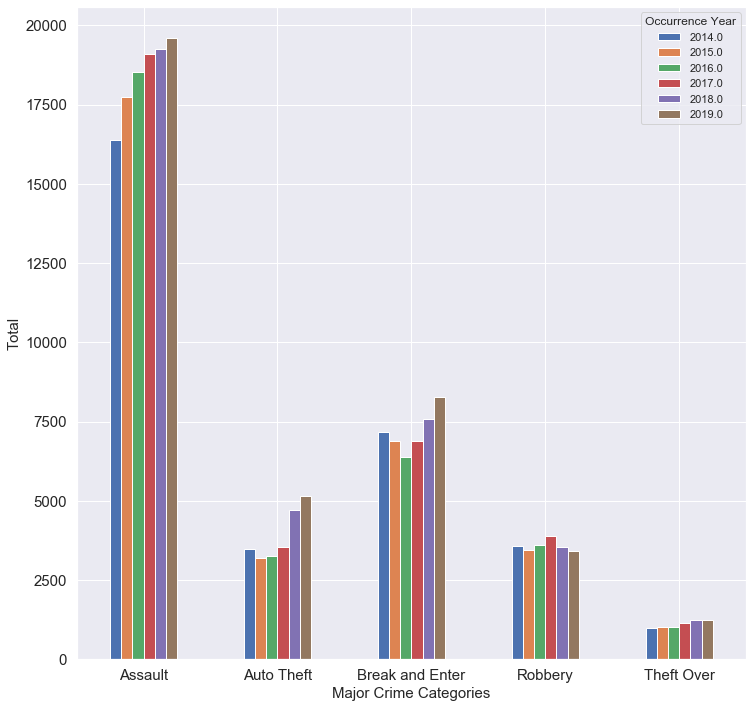

In [12]:
#Plot of major crime indicators during the years from 2014 to 2019
df_ct_plot = pd.crosstab(df.MCI, df.occurrenceyear)
df_ct_plot.plot(kind='bar', stacked=False, rot = 0, figsize=(12, 12), fontsize=15);
plt.ylabel('Total', fontsize=15)
plt.xlabel('Major Crime Categories',fontsize=15)
#plt.title('Major Crime Indicators by Year',fontsize=15)
plt.legend(title = "Occurrence Year")

## Heat Map Indicating the density of crime over the Toronto Area

In [13]:
#include years from 2014 2019
crime = df[df.occurrenceyear >=2014]
crime = df[df.occurrenceyear <=2019]

In [14]:
Crime_Neighbourhoods = crime.groupby('Neighbourhood')[['MCI']].count().sort_values(by=['MCI'])

map_data = crime[['Neighbourhood', 'Lat', 'Long']].drop_duplicates('Neighbourhood').set_index('Neighbourhood') \
    .join(Crime_Neighbourhoods, how='inner')

In [15]:
import folium 
from folium.plugins import HeatMap, MarkerCluster 

m = folium.Map(
    location=[43.702270, -79.366074],
    zoom_start=11
)

cluster = MarkerCluster().add_to(m)

for x in map_data.iterrows():
    folium.Marker([x[1].Lat, x[1].Long]).add_to(cluster)
    
max_crime_prone = map_data['MCI'].max() 

heatmap = HeatMap(map_data.values,
                min_opacity=0.2,
                max_val=max_crime_prone,
                radius=30, blur=20, 
                max_zoom=11)

heatmap.add_to(m)

m

## K-means Clustering

## Import necessary libraries

In [16]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

In [17]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [18]:
df = pd.read_csv("MCI_2014_to_2019.csv")

In [19]:
df.shape

(206435, 29)

In [20]:
df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,2015,December,18,352,Friday,3,2015.0,December,18.0,352.0,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,2015,August,17,229,Monday,22,2015.0,August,15.0,227.0,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,2015,August,18,230,Tuesday,14,2015.0,August,16.0,228.0,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,2015,December,18,352,Friday,13,2015.0,November,26.0,330.0,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,2015,December,18,352,Friday,19,2015.0,December,18.0,352.0,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005


## For clustering focus on the neighbourhood,lat,long,offence

Each of MCI is subdivided into different offence types. Lets create a new dataframe which contains this info.



In [21]:
df.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype', 'ucr_code', 'ucr_ext', 'offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division', 'Hood_ID',
       'Neighbourhood', 'Long', 'Lat', 'ObjectId'],
      dtype='object')

In [22]:
# X, Y are Long and Lat of the crimes
crimes = df.loc[:,["Neighbourhood","Lat","Long","offence"]]
crimes.columns = ["Neighbourhood","crime_Lat","crime_Long","offence"]
crimes.head()

,Neighbourhood,crime_Lat,crime_Long,offence
0,University (79),43.656982,-79.405228,Assault
1,Tam O'Shanter-Sullivan (118),43.778732,-79.307907,Assault
2,Woburn (137),43.765942,-79.225029,B&E
3,Centennial Scarborough (133),43.778648,-79.140823,B&E
4,Taylor-Massey (61),43.691235,-79.288361,Assault


In [23]:
#Checking for any null values present:
print(crimes.isna().sum())

print("Number of unique neighbourhoods present: {}".format(crimes.Neighbourhood.nunique()))
print("Number of unique offence types: {}".format(crimes.offence.nunique()))

Neighbourhood    0
crime_Lat        0
crime_Long       0
offence          0
dtype: int64
Number of unique neighbourhoods present: 140
Number of unique offence types: 49


In [24]:
# We shall remove the neighbourhood id from the neighbourhood and have only the neighbourhood name.
crimes['Neighbourhood'] = crimes.Neighbourhood.apply(lambda x: x.split('(')[0].strip())
crimes.head(2)

,Neighbourhood,crime_Lat,crime_Long,offence
0,University,43.656982,-79.405228,Assault
1,Tam O'Shanter-Sullivan,43.778732,-79.307907,Assault


In [25]:
crimes.shape

(206435, 4)

In [26]:
# Frequency of the offences over the duration
crimes['offence'].value_counts()

Assault                           76124
B&E                               36305
Theft Of Motor Vehicle            23380
Assault With Weapon               18168
Robbery - Mugging                  6847
B&E W'Intent                       5630
Assault Bodily Harm                5104
Theft Over                         3906
Assault Peace Officer              3581
Robbery With Weapon                3578
Robbery - Other                    3533
Robbery - Business                 2434
Assault - Resist/ Prevent Seiz     2376
Robbery - Swarming                 1947
Aggravated Assault                 1864
Theft From Motor Vehicle Over      1590
Discharge Firearm With Intent      1369
Unlawfully In Dwelling-House       1272
Discharge Firearm - Recklessly      896
Robbery - Purse Snatch              835
Robbery - Home Invasion             830
Pointing A Firearm                  737
Theft From Mail / Bag / Key         699
Robbery - Financial Institute       644
Theft Over - Shoplifting            384


In [27]:
crimes.head()

,Neighbourhood,crime_Lat,crime_Long,offence
0,University,43.656982,-79.405228,Assault
1,Tam O'Shanter-Sullivan,43.778732,-79.307907,Assault
2,Woburn,43.765942,-79.225029,B&E
3,Centennial Scarborough,43.778648,-79.140823,B&E
4,Taylor-Massey,43.691235,-79.288361,Assault


In [28]:
# add column "Neigh_toronto" which has value of Neighbourhood + ", Toronto"
# this new column is used for getting the geo locations of the neighbourhoods.
crimes["Neigh_toronto"] = crimes.Neighbourhood.apply(lambda x:x+", Toronto")

In [29]:
crimes.head()

,Neighbourhood,crime_Lat,crime_Long,offence,Neigh_toronto
0,University,43.656982,-79.405228,Assault,"University, Toronto"
1,Tam O'Shanter-Sullivan,43.778732,-79.307907,Assault,"Tam O'Shanter-Sullivan, Toronto"
2,Woburn,43.765942,-79.225029,B&E,"Woburn, Toronto"
3,Centennial Scarborough,43.778648,-79.140823,B&E,"Centennial Scarborough, Toronto"
4,Taylor-Massey,43.691235,-79.288361,Assault,"Taylor-Massey, Toronto"


In [30]:
#crimes.groupby('Neighbourhood').count()
crimes.shape

(206435, 5)

## One hot encoding the offence types

In [31]:

crimes_onehot = pd.get_dummies(crimes[['offence']], prefix="", prefix_sep="")

# add neighbourhood column to this dataframe dataframe
crimes_onehot['Neighbourhood'] = crimes['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [crimes_onehot.columns[-1]] + list(crimes_onehot.columns[:-1])
crimes_onehot = crimes_onehot[fixed_columns]

crimes_onehot.head()

,Neighbourhood,Administering Noxious Thing,Aggravated Aslt Peace Officer,Aggravated Assault,Aggravated Assault Avails Pros,Air Gun Or Pistol: Bodily Harm,Assault,Assault - Force/Thrt/Impede,Assault - Resist/ Prevent Seiz,Assault Bodily Harm,Assault Peace Officer,Assault Peace Officer Wpn/Cbh,Assault With Weapon,B&E,B&E - M/Veh To Steal Firearm,B&E - To Steal Firearm,B&E Out,B&E W'Intent,Crim Negligence Bodily Harm,Disarming Peace/Public Officer,Discharge Firearm - Recklessly,Discharge Firearm With Intent,Pointing A Firearm,Robbery - Armoured Car,Robbery - Atm,Robbery - Business,Robbery - Delivery Person,Robbery - Financial Institute,Robbery - Home Invasion,Robbery - Mugging,Robbery - Other,Robbery - Purse Snatch,Robbery - Swarming,Robbery - Taxi,Robbery - Vehicle Jacking,Robbery With Weapon,Set/Place Trap/Intend Death/Bh,Theft - Misapprop Funds Over,Theft From Mail / Bag / Key,Theft From Motor Vehicle Over,Theft Of Motor Vehicle,Theft Of Utilities Over,Theft Over,Theft Over - Bicycle,Theft Over - Distraction,Theft Over - Shoplifting,Traps Likely Cause Bodily Harm,Unlawfully Causing Bodily Harm,Unlawfully In Dwelling-House,Use Firearm / Immit Commit Off
0,University,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Tam O'Shanter-Sullivan,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Woburn,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Centennial Scarborough,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Taylor-Massey,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
crimes_onehot.shape

(206435, 50)

## Next, let's group rows by neighbourhood and by taking the mean to get frequency of occurrence of each offence category in a neighbourhood.

In [33]:
crimes_grouped = crimes_onehot.groupby('Neighbourhood').mean().reset_index()
crimes_grouped

,Neighbourhood,Administering Noxious Thing,Aggravated Aslt Peace Officer,Aggravated Assault,Aggravated Assault Avails Pros,Air Gun Or Pistol: Bodily Harm,Assault,Assault - Force/Thrt/Impede,Assault - Resist/ Prevent Seiz,Assault Bodily Harm,Assault Peace Officer,Assault Peace Officer Wpn/Cbh,Assault With Weapon,B&E,B&E - M/Veh To Steal Firearm,B&E - To Steal Firearm,B&E Out,B&E W'Intent,Crim Negligence Bodily Harm,Disarming Peace/Public Officer,Discharge Firearm - Recklessly,Discharge Firearm With Intent,Pointing A Firearm,Robbery - Armoured Car,Robbery - Atm,Robbery - Business,Robbery - Delivery Person,Robbery - Financial Institute,Robbery - Home Invasion,Robbery - Mugging,Robbery - Other,Robbery - Purse Snatch,Robbery - Swarming,Robbery - Taxi,Robbery - Vehicle Jacking,Robbery With Weapon,Set/Place Trap/Intend Death/Bh,Theft - Misapprop Funds Over,Theft From Mail / Bag / Key,Theft From Motor Vehicle Over,Theft Of Motor Vehicle,Theft Of Utilities Over,Theft Over,Theft Over - Bicycle,Theft Over - Distraction,Theft Over - Shoplifting,Traps Likely Cause Bodily Harm,Unlawfully Causing Bodily Harm,Unlawfully In Dwelling-House,Use Firearm / Immit Commit Off
0,Agincourt North,0.000000,0.0,0.005186,0.000000,0.000000,0.293863,0.000000,0.005186,0.019015,0.002593,0.000000,0.056180,0.244598,0.0,0.000000,0.000000,0.031115,0.000000,0.000000,0.000864,0.001729,0.002593,0.00000,0.000000,0.005186,0.003457,0.005186,0.000864,0.063094,0.034572,0.013829,0.011236,0.000000,0.000864,0.018150,0.0,0.0,0.002593,0.010372,0.153846,0.0,0.010372,0.000000,0.000864,0.000000,0.0,0.000000,0.001729,0.000864
1,Agincourt South-Malvern West,0.000606,0.0,0.006061,0.000000,0.000000,0.290909,0.001212,0.007879,0.023636,0.006061,0.001212,0.072727,0.250909,0.0,0.000000,0.000000,0.037576,0.000606,0.000000,0.004848,0.007273,0.004848,0.00000,0.001212,0.010303,0.000606,0.003636,0.003636,0.030303,0.017576,0.001818,0.006061,0.000606,0.006061,0.017576,0.0,0.0,0.000606,0.021212,0.133333,0.0,0.021818,0.000606,0.003030,0.001212,0.0,0.000000,0.001818,0.000606
2,Alderwood,0.001835,0.0,0.007339,0.000000,0.000000,0.271560,0.001835,0.003670,0.038532,0.009174,0.000000,0.060550,0.220183,0.0,0.000000,0.000000,0.045872,0.000000,0.000000,0.001835,0.000000,0.001835,0.00000,0.000000,0.022018,0.003670,0.003670,0.000000,0.025688,0.011009,0.001835,0.000000,0.000000,0.001835,0.005505,0.0,0.0,0.003670,0.020183,0.177982,0.0,0.051376,0.000000,0.000000,0.000000,0.0,0.001835,0.005505,0.000000
3,Annex,0.011313,0.0,0.006514,0.000000,0.000000,0.349332,0.002743,0.013027,0.025711,0.019198,0.001714,0.069249,0.251628,0.0,0.000000,0.001028,0.045595,0.000686,0.000343,0.001371,0.002400,0.003085,0.00000,0.000343,0.013027,0.000686,0.004457,0.003428,0.028454,0.010970,0.004457,0.009599,0.000000,0.000343,0.008228,0.0,0.0,0.001714,0.011313,0.045252,0.0,0.036339,0.001371,0.000343,0.009599,0.0,0.000000,0.005142,0.000000
4,Banbury-Don Mills,0.000000,0.0,0.002490,0.000000,0.000000,0.297095,0.000830,0.004979,0.014108,0.009959,0.000000,0.058921,0.316183,0.0,0.000830,0.000000,0.042324,0.002490,0.000000,0.002490,0.002490,0.004979,0.00000,0.000000,0.003320,0.000000,0.004149,0.002490,0.023237,0.016598,0.001660,0.007469,0.000000,0.003320,0.012448,0.0,0.0,0.002490,0.005809,0.108714,0.0,0.040664,0.000000,0.001660,0.000830,0.0,0.000000,0.004979,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Wychwood,0.001248,0.0,0.001248,0.000000,0.000000,0.373283,0.001248,0.003745,0.027466,0.027466,0.003745,0.078652,0.209738,0.0,0.000000,0.000000,0.036205,0.000000,0.000000,0.002497,0.001248,0.003745,0.00000,0.000000,0.016230,0.000000,0.004994,0.000000,0.021223,0.014981,0.006242,0.007491,0.001248,0.002497,0.028714,0.0,0.0,0.002497,0.002497,0.098627,0.0,0.011236,0.000000,0.000000,0.001248,0.0,0.000000,0.008739,0.000000
136,Yonge-Eglinton,0.001215,0.0,0.002430,0.000000,0.000000,0.40

In [34]:
# Execute individual line to understand the below for loop:
temp = crimes_grouped[crimes_grouped['Neighbourhood'] == 'Agincourt North'].T.reset_index()
temp.columns = ['offence','freq']
temp = temp.iloc[1:] # as the first row contains Neighbourhood and Neighbourhood_name
temp['freq'] = temp['freq'].astype(float)  # change the frequency type to float.
temp = temp.round({'freq': 2}) # round the freq to 2 decimal places.

In [35]:
temp.freq.sum()

0.9799999999999999

###  Let's print each neighbourhood along with the top 5 most common offences

In [36]:
num_top_offences = 5

for hood in crimes_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = crimes_grouped[crimes_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['offence','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_offences))
    print('\n')

----Agincourt North----
                  offence  freq
0                 Assault  0.29
1                     B&E  0.24
2  Theft Of Motor Vehicle  0.15
3       Robbery - Mugging  0.06
4     Assault With Weapon  0.06


----Agincourt South-Malvern West----
                  offence  freq
0                 Assault  0.29
1                     B&E  0.25
2  Theft Of Motor Vehicle  0.13
3     Assault With Weapon  0.07
4            B&E W'Intent  0.04


----Alderwood----
                  offence  freq
0                 Assault  0.27
1                     B&E  0.22
2  Theft Of Motor Vehicle  0.18
3     Assault With Weapon  0.06
4              Theft Over  0.05


----Annex----
                  offence  freq
0                 Assault  0.35
1                     B&E  0.25
2     Assault With Weapon  0.07
3            B&E W'Intent  0.05
4  Theft Of Motor Vehicle  0.05


----Banbury-Don Mills----
                  offence  freq
0                     B&E  0.32
1                 Assault  0.30
2  Theft 

4       Robbery - Mugging  0.04


----Humewood-Cedarvale----
                  offence  freq
0                 Assault  0.33
1                     B&E  0.24
2  Theft Of Motor Vehicle  0.15
3     Assault With Weapon  0.06
4            B&E W'Intent  0.05


----Ionview----
                  offence  freq
0                 Assault  0.46
1                     B&E  0.14
2     Assault With Weapon  0.11
3  Theft Of Motor Vehicle  0.05
4            B&E W'Intent  0.04


----Islington-City Centre West----
                  offence  freq
0                 Assault  0.30
1  Theft Of Motor Vehicle  0.23
2                     B&E  0.18
3     Assault With Weapon  0.05
4              Theft Over  0.04


----Junction Area----
                  offence  freq
0                 Assault  0.37
1                     B&E  0.18
2  Theft Of Motor Vehicle  0.14
3     Assault With Weapon  0.08
4            B&E W'Intent  0.04


----Keelesdale-Eglinton West----
                  offence  freq
0                 Assault

                  offence  freq
0                 Assault  0.42
1                     B&E  0.17
2     Assault With Weapon  0.11
3  Theft Of Motor Vehicle  0.09
4            B&E W'Intent  0.03


----Waterfront Communities-The Island----
                 offence  freq
0                Assault  0.44
1                    B&E  0.16
2    Assault With Weapon  0.09
3    Assault Bodily Harm  0.05
4  Assault Peace Officer  0.04


----West Hill----
                  offence  freq
0                 Assault  0.44
1     Assault With Weapon  0.14
2                     B&E  0.10
3  Theft Of Motor Vehicle  0.05
4       Robbery - Mugging  0.04


----West Humber-Clairville----
                  offence  freq
0  Theft Of Motor Vehicle  0.39
1                 Assault  0.22
2                     B&E  0.12
3     Assault With Weapon  0.05
4              Theft Over  0.04


----Westminster-Branson----
                  offence  freq
0                 Assault  0.40
1                     B&E  0.20
2  Theft Of Mot

## Let's put that into a pandas dataframe

First, let's write a function to sort the offences in descending order.

In [37]:
def f_return_most_common_offences(row, num_top_offences):
    row_categories = row.iloc[1:]   # as the column 0 is 'Neighbourhood'
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_offences]

In [38]:
crimes_grouped.head(1)

,Neighbourhood,Administering Noxious Thing,Aggravated Aslt Peace Officer,Aggravated Assault,Aggravated Assault Avails Pros,Air Gun Or Pistol: Bodily Harm,Assault,Assault - Force/Thrt/Impede,Assault - Resist/ Prevent Seiz,Assault Bodily Harm,Assault Peace Officer,Assault Peace Officer Wpn/Cbh,Assault With Weapon,B&E,B&E - M/Veh To Steal Firearm,B&E - To Steal Firearm,B&E Out,B&E W'Intent,Crim Negligence Bodily Harm,Disarming Peace/Public Officer,Discharge Firearm - Recklessly,Discharge Firearm With Intent,Pointing A Firearm,Robbery - Armoured Car,Robbery - Atm,Robbery - Business,Robbery - Delivery Person,Robbery - Financial Institute,Robbery - Home Invasion,Robbery - Mugging,Robbery - Other,Robbery - Purse Snatch,Robbery - Swarming,Robbery - Taxi,Robbery - Vehicle Jacking,Robbery With Weapon,Set/Place Trap/Intend Death/Bh,Theft - Misapprop Funds Over,Theft From Mail / Bag / Key,Theft From Motor Vehicle Over,Theft Of Motor Vehicle,Theft Of Utilities Over,Theft Over,Theft Over - Bicycle,Theft Over - Distraction,Theft Over - Shoplifting,Traps Likely Cause Bodily Harm,Unlawfully Causing Bodily Harm,Unlawfully In Dwelling-House,Use Firearm / Immit Commit Off
0,Agincourt North,0.0,0.0,0.005186,0.0,0.0,0.293863,0.0,0.005186,0.019015,0.002593,0.0,0.05618,0.244598,0.0,0.0,0.0,0.031115,0.0,0.0,0.000864,0.001729,0.002593,0.0,0.0,0.005186,0.003457,0.005186,0.000864,0.063094,0.034572,0.013829,0.011236,0.0,0.000864,0.01815,0.0,0.0,0.002593,0.010372,0.153846,0.0,0.010372,0.0,0.000864,0.0,0.0,0.0,0.001729,0.000864


In [39]:
# above function creation using this logic
r = crimes_grouped.iloc[0, :]
rc = r.iloc[1:]
rcs = rc.sort_values(ascending=False)  #pandas series with offence types as index
print(rcs.head())
rcs.index.values[0:5]

Assault                    0.293863
B&E                        0.244598
Theft Of Motor Vehicle     0.153846
Robbery - Mugging         0.0630942
Assault With Weapon       0.0561798
Name: 0, dtype: object


array(['Assault', 'B&E', 'Theft Of Motor Vehicle', 'Robbery - Mugging',
       'Assault With Weapon'], dtype=object)

## Clustering K-means

In [40]:
# Import KMeans for clustering

from sklearn.cluster import KMeans
# set number of clusters (I choose 5)
kclusters = 5

crimes_grouped_clustering = crimes_grouped.drop('Neighbourhood', 1) #drop the column neighbourhood column

#print(crimes_grouped_clustering.head())

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(crimes_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([2, 2, 4, 2, 2, 4, 0, 2, 2, 1, 3, 3, 0, 3, 0, 2, 1, 0, 3, 2])

In [42]:
conda install -c districtdatalabs yellowbrick

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\pooja\anaconda3

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py37haa95532_0        14.4 MB
    pytest-runner-5.3.1        |     pyhd3eb1b0_0          11 KB
    yellowbrick-1.3            |           py37_0         284 KB  districtdatalabs
    ------------------------------------------------------------
                                           Total:        14.7 MB

The following NEW packages will be INSTALLED:

  pytest-runner      pkgs/main/noarch::pytest-runner-5.3.1-pyhd3eb1b0_0
  yellowbrick        districtdatalabs/win-64::yellowbrick-1.3-py37_0

The following packages will be UPDATED:

  conda                               4.10.3-py37haa95532_0 --> 4.11.0-py37haa95532_0




conda-4.11.0         | 14.4 MB   |  

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(144): Could not remove or rename C:\Users\pooja\anaconda3\Lib\site-packages\conda\_vendor\frozendict.py.  Please remove this file manually (you may need to reboot to free file handles)


## Find Optimal k

In [43]:
# Better approach for finding optimal K.
import sklearn
from yellowbrick.cluster import KElbowVisualizer

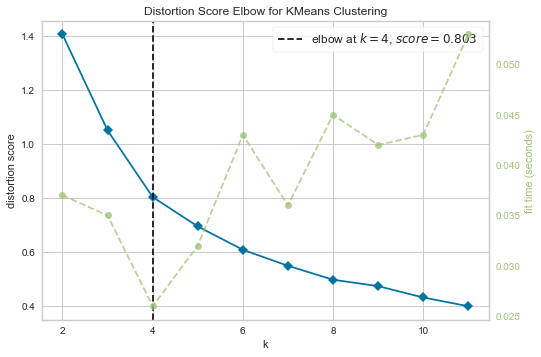

In [44]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(crimes_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
#visualizer.show(outpath="optimalk.png")

## Remodelling the kMeans algorithm with k=4 as number of clusters

In [45]:
kclusters = 4

crimes_grouped_clustering = crimes_grouped.drop('Neighbourhood', 1) #drop the column Neighborhood column

#print(crimes_grouped_clustering.head())

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(crimes_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([0, 0, 1, 0, 0, 1, 3, 0, 0, 2, 3, 3, 3, 3, 3, 0, 2, 3, 1, 0])

Now let's create the new dataframe and display the top 10 offences for each neighbourhood.

In [47]:
num_top_offences = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top offences
columns = ['Neighbourhood']
for ind in np.arange(num_top_offences):
    try:
        columns.append('{}{} Most Common offence'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common offence'.format(ind+1))

# create a new dataframe
neighbourhoods_offences_sorted = pd.DataFrame(columns=columns)
neighbourhoods_offences_sorted['Neighbourhood'] = crimes_grouped['Neighbourhood']

for ind in np.arange(crimes_grouped.shape[0]):
    neighbourhoods_offences_sorted.iloc[ind, 1:] = f_return_most_common_offences(crimes_grouped.iloc[ind, :], num_top_offences)

neighbourhoods_offences_sorted.head()



,Neighbourhood,1st Most Common offence,2nd Most Common offence,3rd Most Common offence,4th Most Common offence,5th Most Common offence,6th Most Common offence,7th Most Common offence,8th Most Common offence,9th Most Common offence,10th Most Common offence
0,Agincourt North,Assault,B&E,Theft Of Motor Vehicle,Robbery - Mugging,Assault With Weapon,Robbery - Other,B&E W'Intent,Assault Bodily Harm,Robbery With Weapon,Robbery - Purse Snatch
1,Agincourt South-Malvern West,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,B&E W'Intent,Robbery - Mugging,Assault Bodily Harm,Theft Over,Theft From Motor Vehicle Over,Robbery - Other
2,Alderwood,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,Theft Over,B&E W'Intent,Assault Bodily Harm,Robbery - Mugging,Robbery - Business,Theft From Motor Vehicle Over
3,Annex,Assault,B&E,Assault With Weapon,B&E W'Intent,Theft Of Motor Vehicle,Theft Over,Robbery - Mugging,Assault Bodily Harm,Assault Peace Officer,Robbery - Business
4,Banbury-Don Mills,B&E,Assault,Theft Of Motor Vehicle,Assault With Weapon,B&E W'Intent,Theft Over,Robbery - Mugging,Robbery - Other,Assault Bodily Harm,Robbery With Weapon


## Add cluster labels to the dataframe neighbourhoods_offences_sorted which contains top 10 offences in each neighbourhood and create a new dataframe

In [48]:
neighbourhoods_offences_sorted_w_clusters = neighbourhoods_offences_sorted.copy()
# add clustering labels to a dataframe
neighbourhoods_offences_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

In [49]:
neighbourhoods_offences_sorted_w_clusters.head()

,Cluster Labels,Neighbourhood,1st Most Common offence,2nd Most Common offence,3rd Most Common offence,4th Most Common offence,5th Most Common offence,6th Most Common offence,7th Most Common offence,8th Most Common offence,9th Most Common offence,10th Most Common offence
0,0,Agincourt North,Assault,B&E,Theft Of Motor Vehicle,Robbery - Mugging,Assault With Weapon,Robbery - Other,B&E W'Intent,Assault Bodily Harm,Robbery With Weapon,Robbery - Purse Snatch
1,0,Agincourt South-Malvern West,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,B&E W'Intent,Robbery - Mugging,Assault Bodily Harm,Theft Over,Theft From Motor Vehicle Over,Robbery - Other
2,1,Alderwood,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,Theft Over,B&E W'Intent,Assault Bodily Harm,Robbery - Mugging,Robbery - Business,Theft From Motor Vehicle Over
3,0,Annex,Assault,B&E,Assault With Weapon,B&E W'Intent,Theft Of Motor Vehicle,Theft Over,Robbery - Mugging,Assault Bodily Harm,Assault Peace Officer,Robbery - Business
4,0,Banbury-Don Mills,B&E,Assault,Theft Of Motor Vehicle,Assault With Weapon,B&E W'Intent,Theft Over,Robbery - Mugging,Robbery - Other,Assault Bodily Harm,Robbery With Weapon


## We will merge the dataframe neighbourhoods_offences_sorted_w_clusters and toronto_neighbourhoods to have Neighbourhood,latitude,longitude columns as well.

In [50]:
# We got the neighbourhood lat long from geocode google sheets add on
# we can get the details using google api as well
# we are doing this because geopy.geocoders Nominatim doesn't have all the details of toronto neighbourhood

In [51]:
toronto_neighbourhoods = pd.read_csv(r'toronto_neighbourhood_lat_long.csv')

In [52]:
toronto_neighbourhoods.head()

,Neighbourhood,Latitude,Longitude
0,"University, Toronto",43.660909,-79.395952
1,"Tam O'Shanter-Sullivan, Toronto",43.781059,-79.298114
2,"Woburn, Toronto",43.776470,-79.231728
3,"Centennial Scarborough, Toronto",43.781684,-79.148327
4,"Taylor-Massey, Toronto",43.737705,-79.285308


In [53]:
# We shall remove the ', Toronto' from the Neighbourhood column of the dataframe.
toronto_neighbourhoods['Neighbourhood'] = toronto_neighbourhoods['Neighbourhood'].apply(
lambda x : x.split(',')[0])

In [54]:
toronto_neighbourhoods.head()

,Neighbourhood,Latitude,Longitude
0,University,43.660909,-79.395952
1,Tam O'Shanter-Sullivan,43.781059,-79.298114
2,Woburn,43.776470,-79.231728
3,Centennial Scarborough,43.781684,-79.148327
4,Taylor-Massey,43.737705,-79.285308


In [57]:
toronto_merged = pd.merge(toronto_neighbourhoods,neighbourhoods_offences_sorted_w_clusters,left_on='Neighbourhood',right_on='Neighbourhood')

In [58]:
toronto_merged.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common offence,2nd Most Common offence,3rd Most Common offence,4th Most Common offence,5th Most Common offence,6th Most Common offence,7th Most Common offence,8th Most Common offence,9th Most Common offence,10th Most Common offence
0,University,43.660909,-79.395952,0,Assault,B&E,Assault With Weapon,Robbery - Mugging,Assault Bodily Harm,Theft Of Motor Vehicle,B&E W'Intent,Theft Over,Assault Peace Officer,Robbery - Other
1,Tam O'Shanter-Sullivan,43.781059,-79.298114,0,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,Robbery - Mugging,B&E W'Intent,Assault - Resist/ Prevent Seiz,Robbery - Home Invasion,Assault Bodily Harm,Robbery - Other
2,Woburn,43.776470,-79.231728,3,Assault,B&E,Assault With Weapon,Theft Of Motor Vehicle,Robbery - Mugging,Robbery - Other,Assault Bodily Harm,B&E W'Intent,Robbery With Weapon,Aggravated Assault
3,Centennial Scarborough,43.781684,-79.148327,3,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,B&E W'Intent,Robbery - Mugging,Unlawfully In Dwelling-House,Assault Peace Officer,Robbery - Other,Theft Over
4,Taylor-Massey,43.737705,-79.285308,3,Assault,B&E,Assault With Weapon,Theft Of Motor Vehicle,Robbery - Mugging,B&E W'Intent,Assault - Resist/ Prevent Seiz,Robbery - Other,Assault Bodily Harm,Robbery With Weapon


## Create a map showing the clusters which are formed by the top 10 most common offences in a neighbourhood.

In [59]:
import folium
import matplotlib

# latitude and longitude of toronto
latitude = 43.6533287
longitude = -79.4533965

plt.figure(figsize = (12,34))
# create a map with folium
map_offences10 = folium.Map(location=[latitude,longitude], zoom_start=11,)

# set color scheme for clusters
# colors for [cluster_0, cluster_1, cluster_2, cluster_3]

cluster_colors = ['red','green','blue','darkorange'] 

#colors = plt.cm.Spectral(np.linspace(0,1,kclusters))

# add markers to the map
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], 
                                  toronto_merged['Longitude'], 
                                  toronto_merged['Neighbourhood'], 
                                  toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' belongs to Cluster : ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=cluster_colors[cluster],
        fill=True,
        fill_color=cluster_colors[cluster],
        fill_opacity=1).add_to(map_offences10)
       
map_offences10

<Figure size 864x2448 with 0 Axes>

In [60]:
map_offences10.save('toronto_clusters.html')

### Now we segregate the rows into corresponding clusters

## Cluster 0

In [61]:
# Excluding latitude and longitude columns
cluster_0 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0,toronto_merged.columns[[0] + list(range(3,toronto_merged.shape[1]))]]

In [62]:
#cluster_0.head(10)
cluster_0

,Neighbourhood,Cluster Labels,1st Most Common offence,2nd Most Common offence,3rd Most Common offence,4th Most Common offence,5th Most Common offence,6th Most Common offence,7th Most Common offence,8th Most Common offence,9th Most Common offence,10th Most Common offence
0,University,0,Assault,B&E,Assault With Weapon,Robbery - Mugging,Assault Bodily Harm,Theft Of Motor Vehicle,B&E W'Intent,Theft Over,Assault Peace Officer,Robbery - Other
1,Tam O'Shanter-Sullivan,0,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,Robbery - Mugging,B&E W'Intent,Assault - Resist/ Prevent Seiz,Robbery - Home Invasion,Assault Bodily Harm,Robbery - Other
15,Annex,0,Assault,B&E,Assault With Weapon,B&E W'Intent,Theft Of Motor Vehicle,Theft Over,Robbery - Mugging,Assault Bodily Harm,Assault Peace Officer,Robbery - Business
16,Agincourt North,0,Assault,B&E,Theft Of Motor Vehicle,Robbery - Mugging,Assault With Weapon,Robbery - Other,B&E W'Intent,Assault Bodily Harm,Robbery With Weapon,Robbery - Purse Snatch
17,Bayview Village,0,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,Theft Over,Assault Bodily Harm,B&E W'Intent,Robbery With Weapon,Robbery - Mugging,Theft From Motor Vehicle Over
18,Mount Pleasant West,0,Assault,B&E,Assault With Weapon,B&E W'Intent,Theft Of Motor Vehicle,Assault Bodily Harm,Robbery - Mugging,Theft Over,Robbery - Swarming,Assault - Resist/ Prevent Seiz
28,Dorset Park,0,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,Robbery - Mugging,B&E W'Intent,Robbery - Other,Robbery With Weapon,Theft Over,Assault Bodily Harm
30,South Riverdale,0,Assault,B&E,Assault With Weapon,Theft Of Motor Vehicle,B&E W'Intent,Robbery - Mugging,Robbery With Weapon,Assault Bodily Harm,Theft Over,Robbery - Other
31,Dovercourt-Wallace Emerson-Junction,0,Assault,B&E,Assault With Weapon,Theft Of Motor Vehicle,B&E W'Intent,Robbery - Mugging,Assault Bodily Harm,Robbery - Other,Robbery With Weapon,Robbery - Business
32,Stonegate-Queensway,0,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,Robbery - Mugging,B&E W'Intent,Theft Over,Robbery - Swarming,Assault Bodily Harm,Robbery With Weapon


## Cluster 1

In [63]:
# Excluding latitude and longitude columns
cluster_1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1,toronto_merged.columns[[0] + list(range(3,toronto_merged.shape[1]))]]

In [64]:
cluster_1.head(10)

,Neighbourhood,Cluster Labels,1st Most Common offence,2nd Most Common offence,3rd Most Common offence,4th Most Common offence,5th Most Common offence,6th Most Common offence,7th Most Common offence,8th Most Common offence,9th Most Common offence,10th Most Common offence
7,West Humber-Clairville,1,Theft Of Motor Vehicle,Assault,B&E,Assault With Weapon,Theft Over,Robbery - Mugging,B&E W'Intent,Robbery With Weapon,Robbery - Other,Theft From Motor Vehicle Over
14,Thistletown-Beaumond Heights,1,Assault,Theft Of Motor Vehicle,B&E,Assault With Weapon,Robbery - Business,Robbery - Other,Robbery With Weapon,Assault Bodily Harm,B&E W'Intent,Robbery - Mugging
19,Humber Summit,1,Theft Of Motor Vehicle,Assault,B&E,Assault With Weapon,Theft Over,Robbery - Mugging,Robbery - Business,B&E W'Intent,Theft From Motor Vehicle Over,Discharge Firearm With Intent
25,Islington-City Centre West,1,Assault,Theft Of Motor Vehicle,B&E,Assault With Weapon,Theft Over,B&E W'Intent,Robbery - Mugging,Assault - Resist/ Prevent Seiz,Assault Bodily Harm,Theft From Motor Vehicle Over
27,York University Heights,1,Assault,Theft Of Motor Vehicle,B&E,Assault With Weapon,Robbery - Mugging,Theft Over,Robbery - Swarming,B&E W'Intent,Robbery With Weapon,Assault Bodily Harm
33,Humbermede,1,Assault,Theft Of Motor Vehicle,B&E,Assault With Weapon,Robbery - Mugging,Assault Bodily Harm,Assault Peace Officer,Robbery - Swarming,Theft Over,B&E W'Intent
37,Rockcliffe-Smythe,1,Assault,Theft Of Motor Vehicle,B&E,Assault With Weapon,Robbery - Mugging,Assault Bodily Harm,Robbery With Weapon,Robbery - Business,Theft Over,Robbery - Other
42,Rustic,1,Assault,Theft Of Motor Vehicle,B&E,Assault With Weapon,Robbery - Mugging,Discharge Firearm With Intent,Discharge Firearm - Recklessly,Assault Bodily Harm,Assault Peace Officer,Robbery With Weapon
50,Weston,1,Assault,Theft Of Motor Vehicle,B&E,Assault With Weapon,Robbery - Mugging,Assault Bodily Harm,Robbery - Other,B&E W'Intent,Assault Peace Officer,Robbery With Weapon
57,Yorkdale-Glen Park,1,Assault,Theft Of Motor Vehicle,B&E,Assault With Weapon,Theft Over,Robbery - Mugging,Assault - Resist/ Prevent Seiz,B&E W'Intent,Assault Bodily Harm,Discharge Firearm With Intent


## Cluster 2

In [65]:
# Excluding latitude and longitude columns
cluster_2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2,toronto_merged.columns[[0] + list(range(3,toronto_merged.shape[1]))]]

In [66]:
cluster_2.head(10)

,Neighbourhood,Cluster Labels,1st Most Common offence,2nd Most Common offence,3rd Most Common offence,4th Most Common offence,5th Most Common offence,6th Most Common offence,7th Most Common offence,8th Most Common offence,9th Most Common offence,10th Most Common offence
8,Forest Hill North,2,B&E,Assault,Theft Of Motor Vehicle,B&E W'Intent,Assault With Weapon,Robbery - Mugging,Robbery With Weapon,Theft Over,Robbery - Other,Assault Bodily Harm
10,Bedford Park-Nortown,2,B&E,Theft Of Motor Vehicle,Assault,B&E W'Intent,Theft Over,Assault With Weapon,Robbery - Mugging,Robbery With Weapon,Theft From Motor Vehicle Over,Assault Bodily Harm
55,Lawrence Park South,2,B&E,Theft Of Motor Vehicle,Assault,B&E W'Intent,Assault With Weapon,Theft Over,Theft From Motor Vehicle Over,Robbery With Weapon,Robbery - Other,Robbery - Home Invasion
58,Bridle Path-Sunnybrook-York Mills,2,B&E,Assault,Theft Of Motor Vehicle,B&E W'Intent,Theft Over,Assault With Weapon,Robbery - Vehicle Jacking,Assault Peace Officer,Theft From Motor Vehicle Over,Robbery - Mugging
81,Steeles,2,B&E,Assault,Theft Of Motor Vehicle,Assault With Weapon,B&E W'Intent,Robbery - Mugging,Assault Bodily Harm,Robbery With Weapon,Robbery - Purse Snatch,Theft Over
83,St.Andrew-Windfields,2,B&E,Assault,Theft Of Motor Vehicle,Assault With Weapon,B&E W'Intent,Theft Over,Robbery - Mugging,Assault Bodily Harm,Theft From Motor Vehicle Over,Unlawfully In Dwelling-House
88,Princess-Rosethorn,2,B&E,Theft Of Motor Vehicle,Assault,Robbery - Mugging,B&E W'Intent,Assault With Weapon,Theft Over,Robbery - Other,Robbery - Swarming,Robbery With Weapon
97,Markland Wood,2,B&E,Assault,Theft Of Motor Vehicle,B&E W'Intent,Robbery - Mugging,Robbery - Business,Assault With Weapon,Robbery - Financial Institute,Theft Over,Robbery With Weapon
98,Leaside-Bennington,2,B&E,Assault,Theft Of Motor Vehicle,B&E W'Intent,Theft Over,Robbery - Mugging,Assault With Weapon,Assault Bodily Harm,Robbery - Swarming,Robbery - Business
105,Milliken,2,B&E,Theft Of Motor Vehicle,Assault,Assault With Weapon,B&E W'Intent,Robbery With Weapon,Theft From Motor Vehicle Over,Theft Over,Robbery - Mugging,Assault Bodily Harm


## Cluster 3

In [67]:
# Excluding latitude and longitude columns
cluster_3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3,toronto_merged.columns[[0] + list(range(3,toronto_merged.shape[1]))]]

In [68]:
cluster_3.head(10)

,Neighbourhood,Cluster Labels,1st Most Common offence,2nd Most Common offence,3rd Most Common offence,4th Most Common offence,5th Most Common offence,6th Most Common offence,7th Most Common offence,8th Most Common offence,9th Most Common offence,10th Most Common offence
2,Woburn,3,Assault,B&E,Assault With Weapon,Theft Of Motor Vehicle,Robbery - Mugging,Robbery - Other,Assault Bodily Harm,B&E W'Intent,Robbery With Weapon,Aggravated Assault
3,Centennial Scarborough,3,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,B&E W'Intent,Robbery - Mugging,Unlawfully In Dwelling-House,Assault Peace Officer,Robbery - Other,Theft Over
4,Taylor-Massey,3,Assault,B&E,Assault With Weapon,Theft Of Motor Vehicle,Robbery - Mugging,B&E W'Intent,Assault - Resist/ Prevent Seiz,Robbery - Other,Assault Bodily Harm,Robbery With Weapon
5,Broadview North,3,Assault,B&E,Assault With Weapon,Theft Of Motor Vehicle,B&E W'Intent,Assault Bodily Harm,Robbery - Mugging,Robbery - Other,Assault Peace Officer,Robbery With Weapon
6,Bay Street Corridor,3,Assault,B&E,Assault With Weapon,Assault Peace Officer,Assault - Resist/ Prevent Seiz,Robbery - Mugging,Assault Bodily Harm,Theft Of Motor Vehicle,Theft Over,Robbery - Other
9,Downsview-Roding-CFB,3,Assault,Theft Of Motor Vehicle,Assault With Weapon,B&E,Robbery - Mugging,Assault Bodily Harm,Robbery - Swarming,B&E W'Intent,Robbery - Business,Assault - Resist/ Prevent Seiz
11,Malvern,3,Assault,Assault With Weapon,Theft Of Motor Vehicle,B&E,Robbery - Mugging,Assault Bodily Harm,Robbery - Other,Robbery With Weapon,Theft Over,Discharge Firearm With Intent
12,Waterfront Communities-The Island,3,Assault,B&E,Assault With Weapon,Assault Bodily Harm,Theft Of Motor Vehicle,Assault Peace Officer,Theft Over,B&E W'Intent,Robbery - Mugging,Assault - Resist/ Prevent Seiz
13,Eglinton East,3,Assault,B&E,Assault With Weapon,Theft Of Motor Vehicle,Robbery - Mugging,Assault Bodily Harm,B&E W'Intent,Robbery With Weapon,Robbery - Other,Robbery - Business
20,Oakwood Village,3,Assault,B&E,Assault With Weapon,Theft Of Motor Vehicle,Robbery - Mugging,Robbery With Weapon,Assault Peace Officer,Assault Bodily Harm,Discharge Firearm - Recklessly,Aggravated Assault


In [69]:
# lets see the number of neighbourhoods in each cluster.
for n,i in enumerate([cluster_0,cluster_1,cluster_2,cluster_3]):
    print("The number of neighbourhoods in cluster_{} is {}".format(n,i.shape[0]))

The number of neighbourhoods in cluster_0 is 48
The number of neighbourhoods in cluster_1 is 24
The number of neighbourhoods in cluster_2 is 14
The number of neighbourhoods in cluster_3 is 54


For associate rule mining we shall use neighbourhoods_offences_sorted as this contains neighbourhoods and its top 10 crimes. So the neighbourhoods becomes the baskets and the top 10 crimes in each neighbourhood becomes items.

In [70]:
df_arm = neighbourhoods_offences_sorted.copy()

In [71]:
df_arm.head()

,Neighbourhood,1st Most Common offence,2nd Most Common offence,3rd Most Common offence,4th Most Common offence,5th Most Common offence,6th Most Common offence,7th Most Common offence,8th Most Common offence,9th Most Common offence,10th Most Common offence
0,Agincourt North,Assault,B&E,Theft Of Motor Vehicle,Robbery - Mugging,Assault With Weapon,Robbery - Other,B&E W'Intent,Assault Bodily Harm,Robbery With Weapon,Robbery - Purse Snatch
1,Agincourt South-Malvern West,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,B&E W'Intent,Robbery - Mugging,Assault Bodily Harm,Theft Over,Theft From Motor Vehicle Over,Robbery - Other
2,Alderwood,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,Theft Over,B&E W'Intent,Assault Bodily Harm,Robbery - Mugging,Robbery - Business,Theft From Motor Vehicle Over
3,Annex,Assault,B&E,Assault With Weapon,B&E W'Intent,Theft Of Motor Vehicle,Theft Over,Robbery - Mugging,Assault Bodily Harm,Assault Peace Officer,Robbery - Business
4,Banbury-Don Mills,B&E,Assault,Theft Of Motor Vehicle,Assault With Weapon,B&E W'Intent,Theft Over,Robbery - Mugging,Robbery - Other,Assault Bodily Harm,Robbery With Weapon


lets focus on top 7 most offence types. we can drop the other columns. Started from top 4 most offence types, but many assoc rules were there and it was somewhat interesting at top 7 most offence types.

In [72]:
# we can remove neighbourhood column for arm analysis.
df_arm.drop(columns='Neighbourhood',inplace=True)
# lets focus on top 7 most offence types. we can drop the other columns. Started from top 4 most offence types, but many assoc rules were there and it was somewhat interesting at top 7 most offence types.
last_3cols = list(df_arm.columns[7:])
df_arm.drop(columns=last_3cols, inplace=True)
df_arm.head()

,1st Most Common offence,2nd Most Common offence,3rd Most Common offence,4th Most Common offence,5th Most Common offence,6th Most Common offence,7th Most Common offence
0,Assault,B&E,Theft Of Motor Vehicle,Robbery - Mugging,Assault With Weapon,Robbery - Other,B&E W'Intent
1,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,B&E W'Intent,Robbery - Mugging,Assault Bodily Harm
2,Assault,B&E,Theft Of Motor Vehicle,Assault With Weapon,Theft Over,B&E W'Intent,Assault Bodily Harm
3,Assault,B&E,Assault With Weapon,B&E W'Intent,Theft Of Motor Vehicle,Theft Over,Robbery - Mugging
4,B&E,Assault,Theft Of Motor Vehicle,Assault With Weapon,B&E W'Intent,Theft Over,Robbery - Mugging


In [73]:
# Unique offences across 140 neighbourhoods
items = set()
for col in df_arm:
    items.update(df_arm[col].unique())
print(items)

{'Robbery - Swarming', 'Robbery - Business', 'Assault Bodily Harm', 'Theft Of Motor Vehicle', 'Theft Over', 'B&E', 'Assault - Resist/ Prevent Seiz', 'Theft From Motor Vehicle Over', 'Assault With Weapon', 'Robbery - Vehicle Jacking', 'Discharge Firearm - Recklessly', 'Unlawfully In Dwelling-House', 'Robbery - Mugging', "B&E W'Intent", 'Assault Peace Officer', 'Assault', 'Robbery - Other', 'Robbery - Financial Institute', 'Discharge Firearm With Intent', 'Robbery With Weapon'}


In [74]:
print("There are {} unique offences across 140 neighbourhoods which appear as top 7".format(len(items)))

There are 20 unique offences across 140 neighbourhoods which appear as top 7


In [75]:
# Encode  the values of offence types with 0,1
itemset = set(items)
encoded_values = []
for index, row in df_arm.iterrows():
    rowset = set(row) 
    labels = {}
    uncommon = list(itemset - rowset) # total items - items present in the row. Items not present in row but present in total itemset.
    common = list(itemset.intersection(rowset))  # items present in the row.
    for uc in uncommon:
        labels[uc] = 0
    for com in common:
        labels[com] = 1
    encoded_values.append(labels)
print(encoded_values[0])
ohe_df = pd.DataFrame(encoded_values)

{'Assault - Resist/ Prevent Seiz': 0, 'Robbery - Vehicle Jacking': 0, 'Discharge Firearm With Intent': 0, 'Discharge Firearm - Recklessly': 0, 'Unlawfully In Dwelling-House': 0, 'Robbery - Swarming': 0, 'Robbery - Business': 0, 'Assault Bodily Harm': 0, 'Assault Peace Officer': 0, 'Theft From Motor Vehicle Over': 0, 'Robbery - Financial Institute': 0, 'Theft Over': 0, 'Robbery With Weapon': 0, 'Robbery - Mugging': 1, "B&E W'Intent": 1, 'Assault': 1, 'Robbery - Other': 1, 'Assault With Weapon': 1, 'Theft Of Motor Vehicle': 1, 'B&E': 1}


In [76]:
len(encoded_values)

140

In [77]:
ohe_df.head()

,Assault - Resist/ Prevent Seiz,Robbery - Vehicle Jacking,Discharge Firearm With Intent,Discharge Firearm - Recklessly,Unlawfully In Dwelling-House,Robbery - Swarming,Robbery - Business,Assault Bodily Harm,Assault Peace Officer,Theft From Motor Vehicle Over,Robbery - Financial Institute,Theft Over,Robbery With Weapon,Robbery - Mugging,B&E W'Intent,Assault,Robbery - Other,Assault With Weapon,Theft Of Motor Vehicle,B&E
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1
2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1


## Association Rule Mining


In [79]:
conda install -c conda-forge mlxtend

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\pooja\anaconda3

  added / updated specs:
    - mlxtend


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py37h03978a9_0        16.9 MB  conda-forge
    mlxtend-0.19.0             |     pyhd8ed1ab_0         1.2 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        18.2 MB

The following NEW packages will be INSTALLED:

  mlxtend            conda-forge/noarch::mlxtend-0.19.0-pyhd8ed1ab_0
  python_abi         conda-forge/win-64::python_abi-3.7-2_cp37m

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.11.0-py37haa95532_0 --> conda-forge::conda-4.

In [80]:
# Import necessary packages required for associate rule mining.
from mlxtend.frequent_patterns import apriori, association_rules

In [81]:
pd.set_option("display.max_colwidth", -1)
freq_items = apriori(ohe_df, min_support=0.8, use_colnames=True, verbose=1)
freq_items

Processing 5 combinations | Sampling itemset size 5


C:\Users\pooja\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,support,itemsets
0,0.807143,(Robbery - Mugging)
1,1.000000,(Assault)
2,1.000000,(Assault With Weapon)
3,0.992857,(Theft Of Motor Vehicle)
4,1.000000,(B&E)
5,0.807143,"(Assault, Robbery - Mugging)"
6,0.807143,"(Assault With Weapon, Robbery - Mugging)"
7,0.800000,"(Theft Of Motor Vehicle, Robbery - Mugging)"
8,0.807143,"(B&E, Robbery - Mugging)"
9,1.000000,"(Assault With Weapon, Assault)"


In [82]:
ohe_df.shape

(140, 20)

In [83]:
len(freq_items)

31

In [84]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
175,(Robbery - Mugging),"(Assault With Weapon, Theft Of Motor Vehicle, Assault, B&E)",0.807143,0.992857,0.8,0.991150,0.998281,-0.001378,0.807143
176,(Assault),"(Assault With Weapon, Theft Of Motor Vehicle, B&E, Robbery - Mugging)",1.000000,0.800000,0.8,0.800000,1.000000,0.000000,1.000000
177,(Assault With Weapon),"(Theft Of Motor Vehicle, Assault, B&E, Robbery - Mugging)",1.000000,0.800000,0.8,0.800000,1.000000,0.000000,1.000000
178,(Theft Of Motor Vehicle),"(Assault With Weapon, Assault, B&E, Robbery - Mugging)",0.992857,0.807143,0.8,0.805755,0.998281,-0.001378,0.992857
179,(B&E),"(Assault With Weapon, Theft Of Motor Vehicle, Assault, Robbery - Mugging)",1.000000,0.800000,0.8,0.800000,1.000000,0.000000,1.000000


In [85]:
rules.shape

(180, 9)

In [86]:
rules['len_antecendents'] = rules['antecedents'].apply(lambda x : len(x))

In [87]:
rules['len_consequents'] = rules['consequents'].apply(lambda x : len(x))

In [88]:
# rules of the form {A,B,...} ---> {x,...}
rules_filter = rules[(rules.len_antecendents > 2) & (rules.len_consequents > 1)]

In [89]:
rules_filter

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,len_antecendents,len_consequents
155,"(Assault With Weapon, Assault, Robbery - Mugging)","(Theft Of Motor Vehicle, B&E)",0.807143,0.992857,0.8,0.991150,0.998281,-0.001378,0.807143,3,2
156,"(Theft Of Motor Vehicle, Assault, Robbery - Mugging)","(Assault With Weapon, B&E)",0.800000,1.000000,0.8,1.000000,1.000000,0.000000,inf,3,2
157,"(Assault, B&E, Robbery - Mugging)","(Assault With Weapon, Theft Of Motor Vehicle)",0.807143,0.992857,0.8,0.991150,0.998281,-0.001378,0.807143,3,2
158,"(Assault With Weapon, Theft Of Motor Vehicle, Robbery - Mugging)","(Assault, B&E)",0.800000,1.000000,0.8,1.000000,1.000000,0.000000,inf,3,2
159,"(Assault With Weapon, B&E, Robbery - Mugging)","(Theft Of Motor Vehicle, Assault)",0.807143,0.992857,0.8,0.991150,0.998281,-0.001378,0.807143,3,2
160,"(Theft Of Motor Vehicle, B&E, Robbery - Mugging)","(Assault With Weapon, Assault)",0.800000,1.000000,0.8,1.000000,1.000000,0.000000,inf,3,2
161,"(Assault With Weapon, Theft Of Motor Vehicle, Assault)","(B&E, Robbery - Mugging)",0.992857,0.807143,0.8,0.805755,0.998281,-0.001378,0.992857,3,2
162,"(Assault With Weapon, Assault, B&E)","(Theft Of Motor Vehicle, Robbery - Mugging)",1.000000,0.800000,0.8,0.800000,1.000000,0.000000,1.000000,3,2
163,"(Theft Of Motor Vehicle, Assault, B&E)","(Assault With Weapon, Robbery - Mugging)",0.992857,0.807143,0.8,0.805755,0.998281,-0.001378,0.992857,3,2
164,"(Assault With Weapon, Theft Of Motor Vehicle, B&E)","(Assault, Robbery - Mugging)",0.992857,0.807143,0.8,0.805755,0.998281,-0.001378,0.992857,3,2


In [90]:
rules_filter.shape

(10, 11)

If any three of these five offence types(Assault, Theft Of Motor Vehicle, Assault With Weapon,B&E, Robbery - Mugging) occur then there is a high chance that the other two will occur.